In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

# Lets Start by preprocessing the data. First look at the data

#%%
print(train.head(5))

print(test.head(5))


#%%

#Save train and test Ids and then remove them from the data frames because they are not predictive
trainID = train['Id']
testID = test['Id']

test.drop('Id', axis=1, inplace=True)
train.drop('Id', axis=1, inplace=True)

#save Sales price in a separate array

Y_train = train['SalePrice']


all_data = pd.concat((train, test), sort=True).reset_index(drop=True)


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

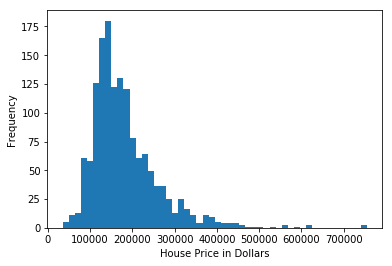

In [12]:
plt.hist(Y_train, bins=50)
plt.ylabel('Frequency')
plt.xlabel('House Price in Dollars')
plt.show()

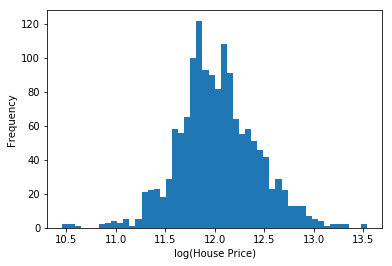

In [13]:
# distribution doesn't look normally distributed, plus the competition scores on log prices so lets take the log transform

plt.hist(np.log(Y_train+1), bins=50)
plt.ylabel('Frequency')
plt.xlabel('log(House Price)')
plt.show()

In [17]:
# looks more normal now

Y_train2=np.log(Y_train+1)




In [19]:
print(all_data.apply(lambda x: x.count(), axis=0))

1stFlrSF         2919
2ndFlrSF         2919
3SsnPorch        2919
Alley            2919
BedroomAbvGr     2919
BldgType         2919
BsmtCond         2919
BsmtExposure     2919
BsmtFinSF1       2919
BsmtFinSF2       2919
BsmtFinType1     2919
BsmtFinType2     2919
BsmtFullBath     2919
BsmtHalfBath     2919
BsmtQual         2919
BsmtUnfSF        2919
CentralAir       2919
Condition1       2919
Condition2       2919
Electrical       2919
EnclosedPorch    2919
ExterCond        2919
ExterQual        2919
Exterior1st      2919
Exterior2nd      2919
Fence            2919
FireplaceQu      2919
Fireplaces       2919
Foundation       2919
FullBath         2919
                 ... 
LotShape         2919
LowQualFinSF     2919
MSSubClass       2919
MSZoning         2919
MasVnrArea       2919
MasVnrType       2919
MiscFeature      2919
MiscVal          2919
MoSold           2919
Neighborhood     2919
OpenPorchSF      2919
OverallCond      2919
OverallQual      2919
PavedDrive       2919
PoolArea  

In [20]:
arrayofmissing=all_data.apply(lambda x: x.count(), axis=0)
# Now I can see which variables are missing data and I can add it back in

all_data["Alley"] = all_data["Alley"].fillna("None")

# All basement Nans come from there being no basement

for col in ["BsmtCond", "BsmtExposure", "BsmtQual", "BsmtFinType1", "BsmtFinType2", "Fence", "FireplaceQu", 
            "GarageCond", "GarageFinish", "GarageQual", "GarageType"]:
    all_data[col]=all_data[col].fillna("None")

# No pool is na, so let's replace it
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

# No square footage when the room doesn't exist

for col in ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "BsmtFullBath", "BsmtHalfBath",
            "GarageArea", "GarageCars", "GarageYrBlt"]:
    all_data[col]=all_data[col].fillna(0)
    


for col in ["Electrical", "Exterior1st", "Exterior2nd", "KitchenQual"]:
    all_data[col]=all_data[col].fillna(all_data[col].mode()[0])

    
for col in ["Functional"]:
    all_data[col]=all_data[col].fillna("Typ")
    

all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
    

all_data["MSZoning"] = all_data["MSZoning"].fillna(all_data["MSZoning"].mode()[0])


all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)


all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
 
all_data["SaleType"] = all_data["SaleType"].fillna(all_data["SaleType"].mode()[0])

all_data["TotalBsmtSF"] = all_data["TotalBsmtSF"].fillna(0)

all_data["Utilities"] = all_data.drop(['Utilities'], axis=1)

all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

# Now we need to use label encoder for categorical features

from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for i in cols:
    labels = LabelEncoder()
    labels.fit(list(all_data[i].values)) 
    all_data[i] = labels.transform(list(all_data[i].values))

#%%

# Generally House Price correlates strongly with home total square footage
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

#%%

from scipy.stats import norm, skew #for some statistics
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})

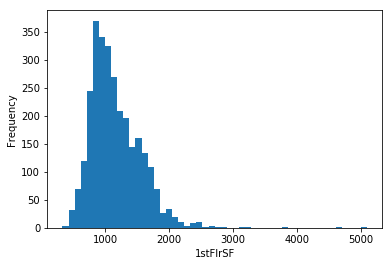

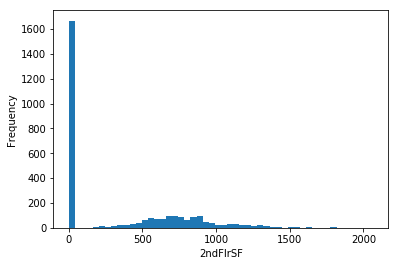

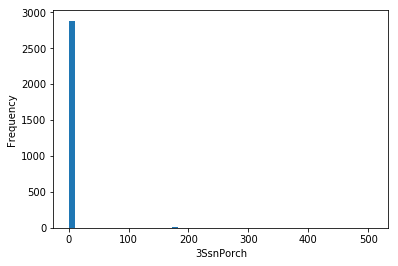

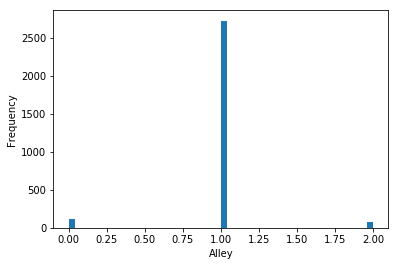

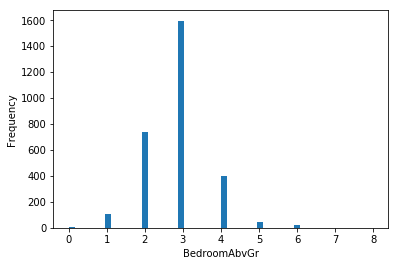

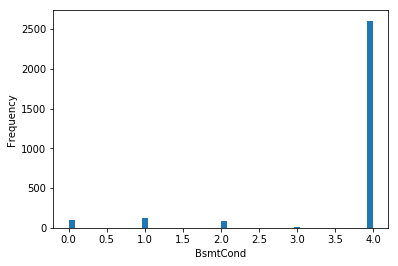

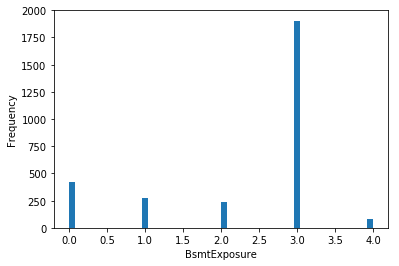

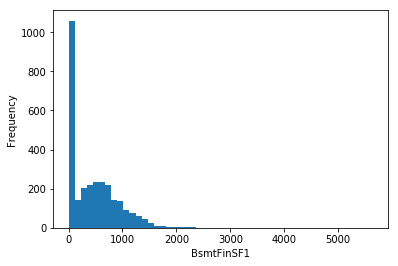

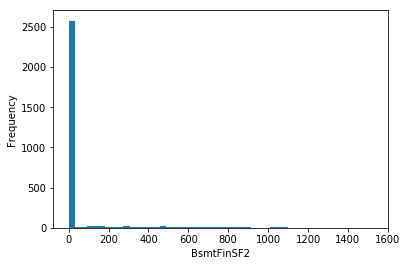

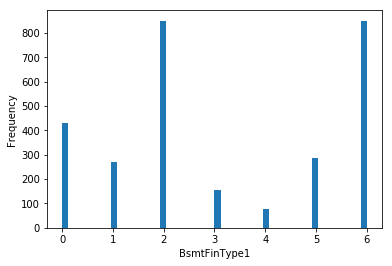

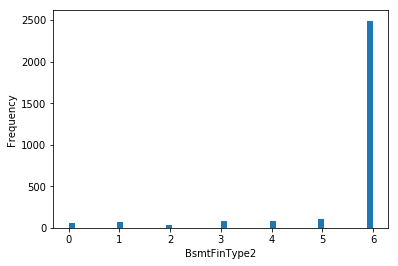

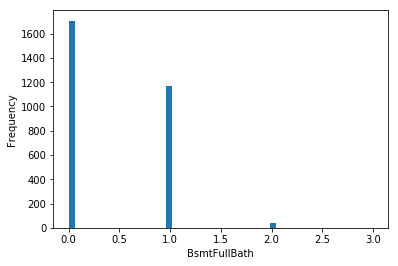

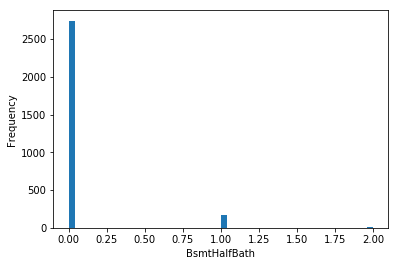

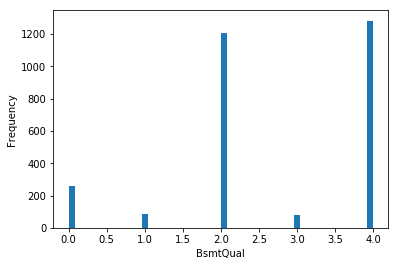

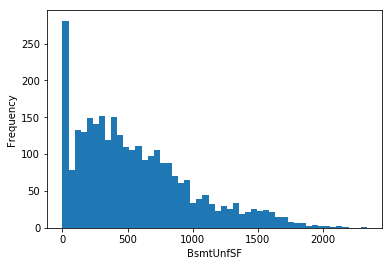

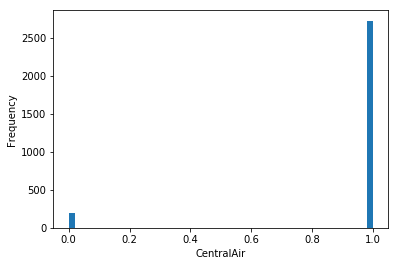

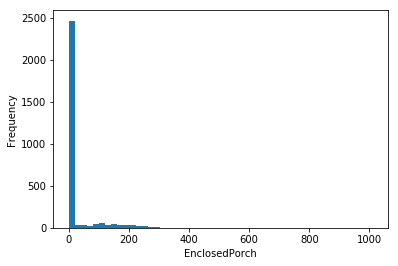

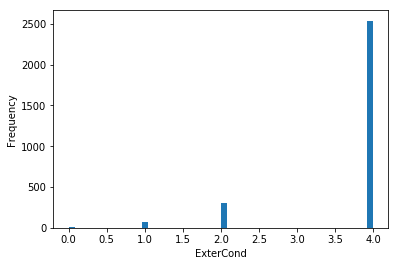

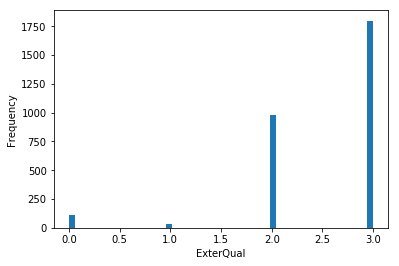

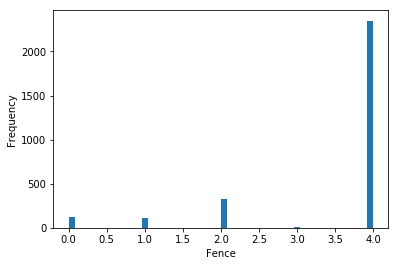

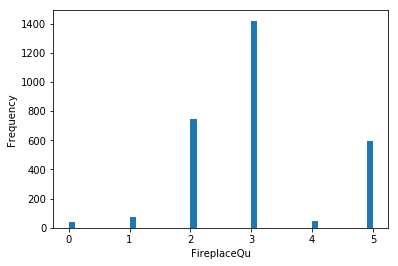

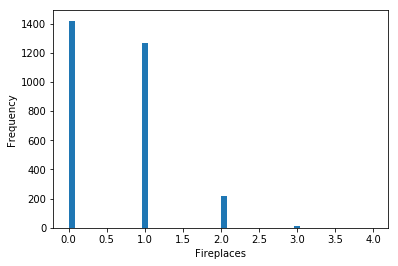

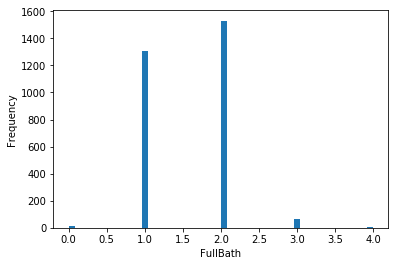

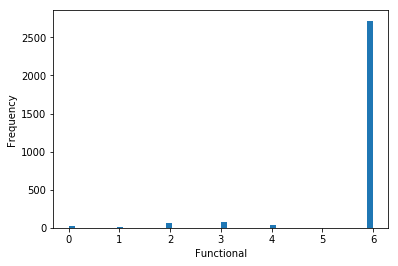

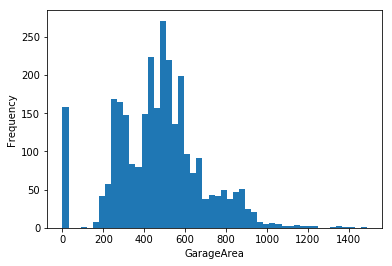

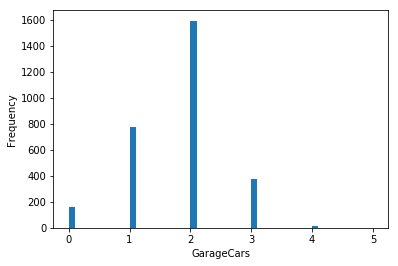

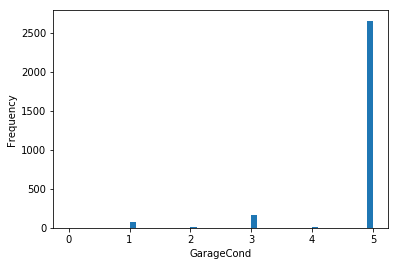

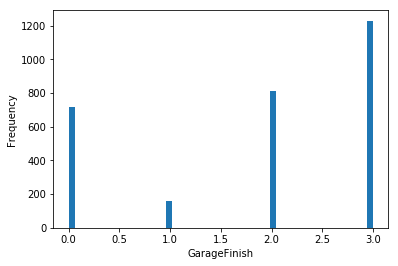

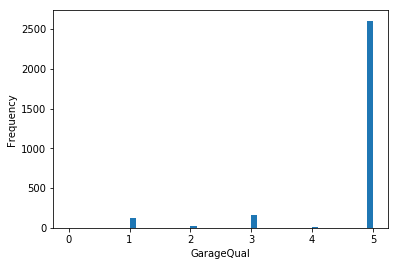

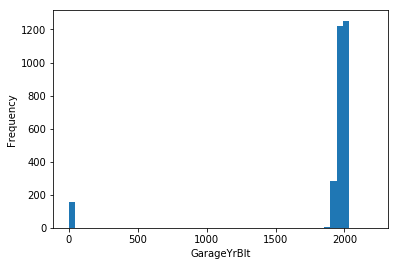

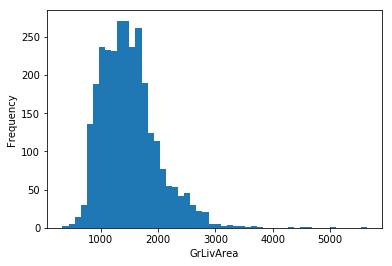

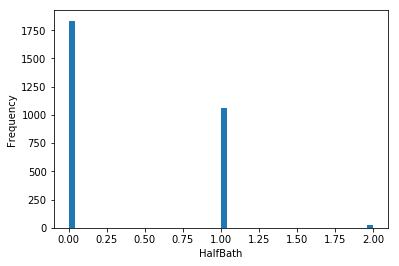

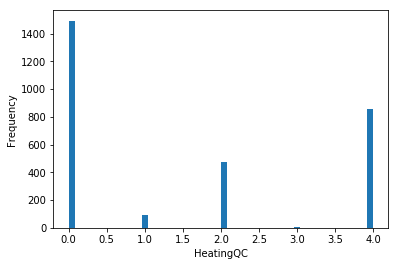

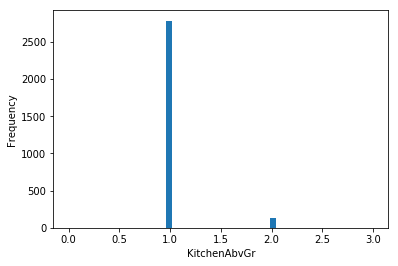

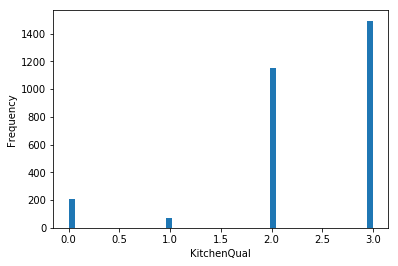

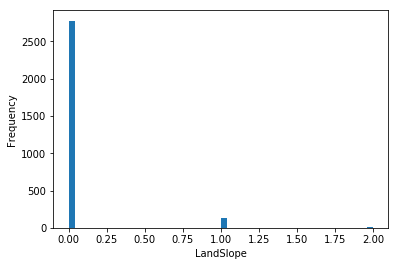

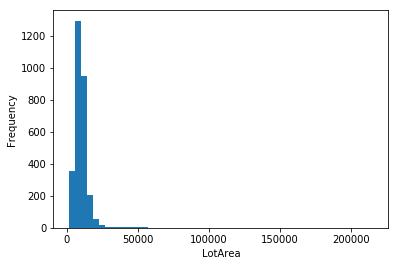

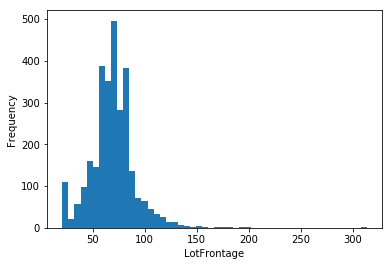

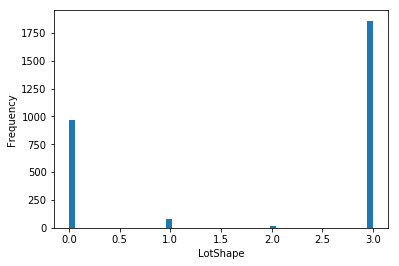

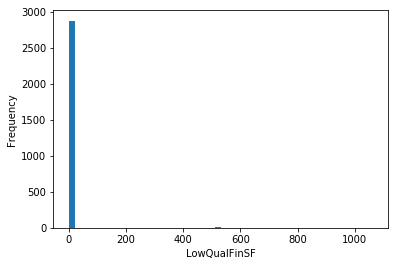

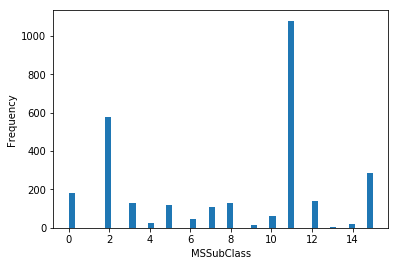

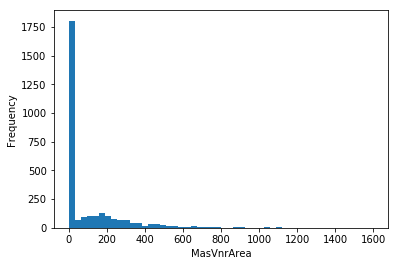

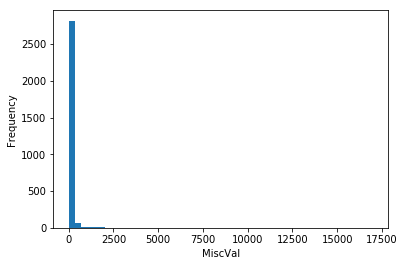

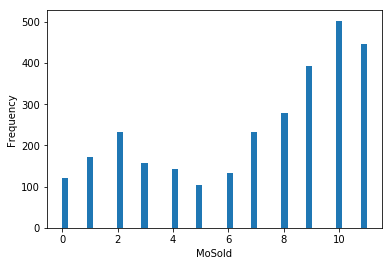

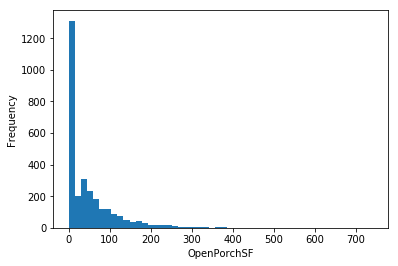

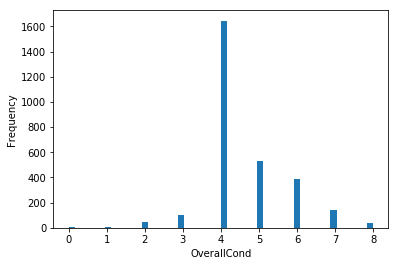

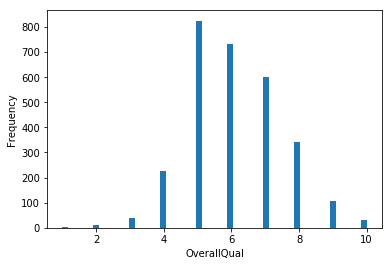

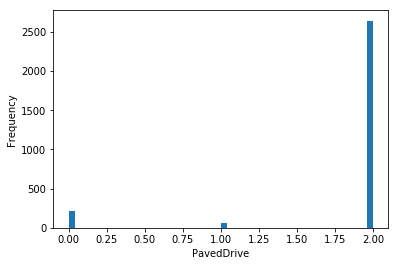

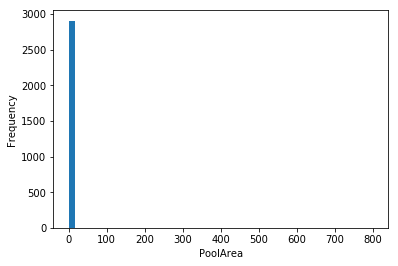

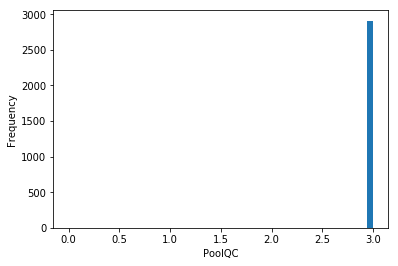

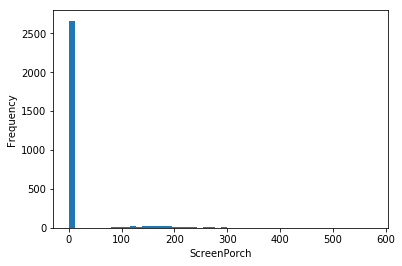

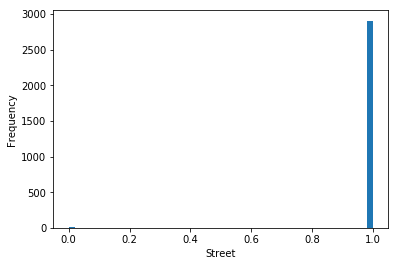

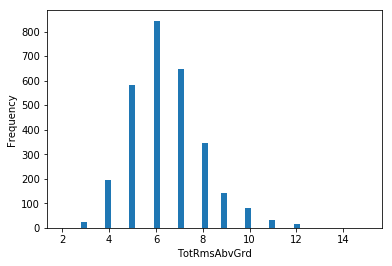

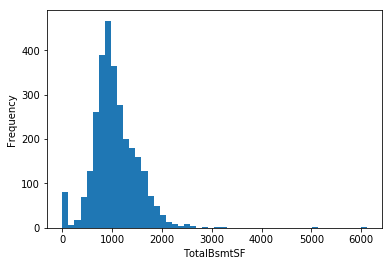

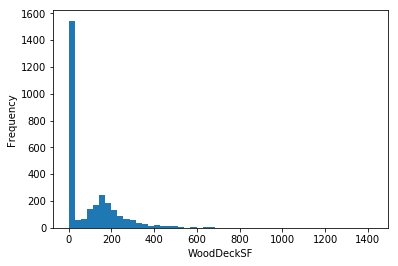

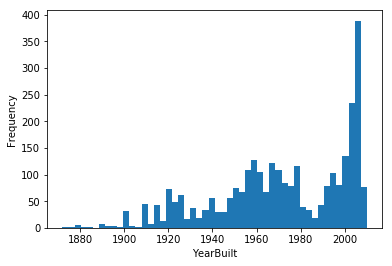

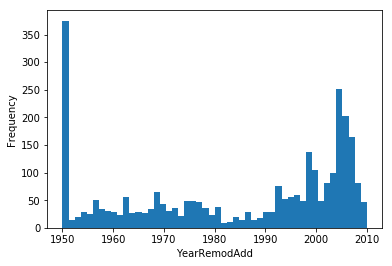

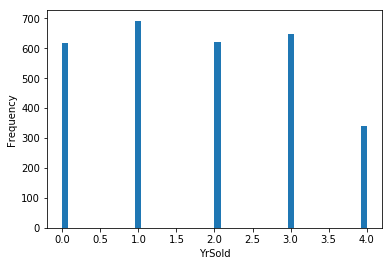

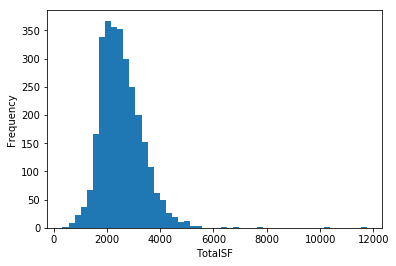

In [21]:
for col in numeric_feats:
    if(type(all_data[col]) != "object"):
        viewing = all_data[col]
        skewview = skew(all_data[col])
        plt.hist(all_data[col], bins=50)
        plt.ylabel('Frequency')
        plt.xlabel(col)
        plt.show()

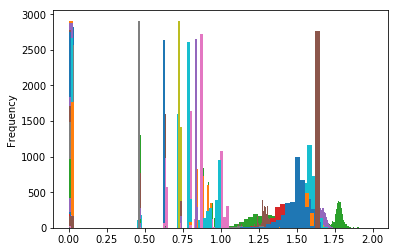

In [24]:
# Gather up skewed features and then apply the Box Cox Transformation to try to normalize the skewed features
skewness = skewness[abs(skewness) > 0.75]
    
from scipy.special import boxcox1p

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)
    plt.hist(all_data[feat], bins=50)
    plt.ylabel('Frequency')

In [25]:
#This appears to work better for some features than for others. Certain features such as "MiscVal" have almost entirely one value,
# thus not much information can be gained generally from features such as these. 

all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 1304)


In [ ]:
ntrain = Y_train.size
train = all_data[:ntrain]
test = all_data[ntrain:]

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 0)
from pprint import pprint
# Look at parameters used by the current forest
#print('Parameters currently in use:\n')
#pprint(rf.get_params())

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 220, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#pprint(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
rf_random.fit(train, Y_train2)

#rf_random.best_params_

from sklearn.model_selection import KFold, cross_val_score, train_test_split

n_folds=5

def rmsle_cvrandforest(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, Y_train2, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)
    
#print(rf_random.best_params_)

RFModel = RandomForestRegressor(n_estimators = 400, min_samples_split = 2, min_samples_leaf = 1, max_features = 'auto', max_depth = 200, bootstrap = True)
RFModel.fit(train, Y_train2)

rmsle_cvrandforest(RFModel)

# Make Predictions

predictions = RFModel.predict(test)

predictions = np.exp(predictions)-1

output = np.array([testID, predictions])
output = np.transpose(output)

outdata=pd.DataFrame(data=output, columns=["ID", "SalesPrice"])

export_csv = outdata.to_csv(r"C:\Users\bhunt\OneDrive\Documents\KaggleData\HousePrice\pred.csv", header=True)
